In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path=r"C:/Users/win10/Desktop/DATA SCIENCE/ExcelR/Assignment Given (Untouched)/1)Linear Regression/Assignment Given/calories_consumed.csv"
path=path.replace("\\","/")
calories_consumed=pd.read_csv(path)

In [3]:
calories_consumed=calories_consumed.rename(columns={'Weight gained (grams)':"Weight",'Calories Consumed':"Calories"})
calories_consumed

,Weight,Calories
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500
5,110,1600
6,128,1400
7,62,1900
8,600,2800
9,1100,3900


(array([6., 2., 2., 0., 0., 1., 1., 0., 1., 1.]),
 array([  62. ,  165.8,  269.6,  373.4,  477.2,  581. ,  684.8,  788.6,
         892.4,  996.2, 1100. ]),
 <a list of 10 Patch objects>)

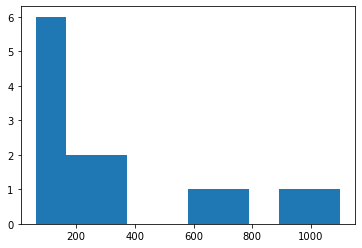

In [6]:
plt.hist(calories_consumed.Weight)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a3f13dd848>,
 'caps': [<matplotlib.lines.Line2D at 0x1a3f13cd8c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a3f13dd888>],
 'medians': [<matplotlib.lines.Line2D at 0x1a3f1322448>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a3f13f39c8>],
 'means': []}

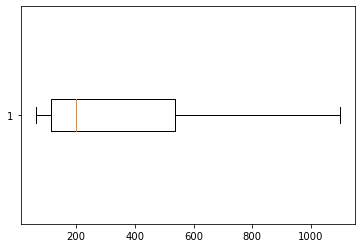

In [7]:
plt.boxplot(calories_consumed.Weight,0,"rs",0)

Text(0, 0.5, 'Weight')

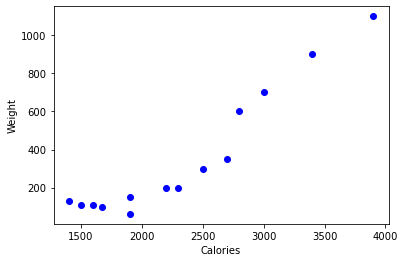

In [8]:
plt.plot(calories_consumed.Calories,calories_consumed.Weight,"bo");plt.xlabel("Calories");plt.ylabel("Weight")

In [9]:
#Lets find the correlation
calories_consumed.Weight.corr(calories_consumed.Calories)

0.9469910088554458

<IPython.core.display.Javascript object>

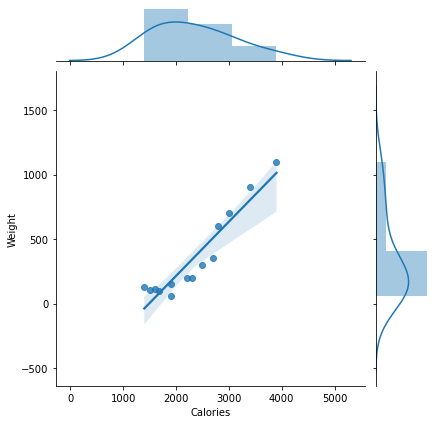

In [33]:
sns.jointplot(calories_consumed["Calories"],calories_consumed["Weight"], kind="reg" , )

In [10]:
np.corrcoef(calories_consumed.Weight,calories_consumed.Calories)

array([[1.        , 0.94699101],
       [0.94699101, 1.        ]])

In [11]:
np.corrcoef(calories_consumed.Weight,calories_consumed.Calories)

array([[1.        , 0.94699101],
       [0.94699101, 1.        ]])

In [12]:
#lets import statsmodels.formula.asi as smf   to apply LR
import statsmodels.formula.api as smf
model=smf.ols("Weight~Calories",data=calories_consumed).fit()
model.params    #This gives model params & intercept

Intercept   -625.752356
Calories       0.420157
dtype: float64

In [13]:
model.summary() # for R-Squared value

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     104.3
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           2.86e-07
Time:                        12:11:01   Log-Likelihood:                -84.792
No. Observations:                  14   AIC:                             173.6
Df Residuals:                      12   BIC:                             174.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -625.7524    100.823     -6.206      0.000    -845.427    -406.078
Calories       0.4202      0.041     10.211      0.000       0.331       0.510
==============================================================================
Omnibus:                        3.394   Durbin-Watson:                   2.537
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                1.227
Skew:                          -0.203   Prob(JB):                        0.541
Kurtosis:                       1.608   Cond. No.                     8.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
model.conf_int(0.05)


,0,1
Intercept,-845.426655,-406.078057
Calories,0.330506,0.509807


In [36]:
pred=model.predict(calories_consumed)
pred

0        4.482599
1      340.607908
2      802.780209
3      298.592245
4      424.639236
5       46.498263
6      -37.533065
7      172.545254
8      550.686227
9     1012.858527
10      75.909227
11     172.545254
12     508.670563
13     634.717554
dtype: float64

Text(0.5, 0, 'Calories')

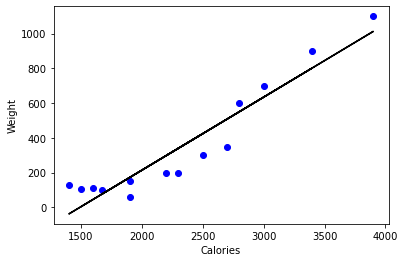

In [37]:
import matplotlib.pylab as plt

plt.scatter(x=calories_consumed['Calories'],y=calories_consumed['Weight'],color='blue')
plt.plot(calories_consumed['Calories'],pred,color='black')
plt.ylabel("Weight")
plt.xlabel("Calories")

In [18]:
pred.corr(calories_consumed.Weight)


0.9469910088554458

In [20]:
model1=smf.ols("Weight~np.log(Calories)",data=calories_consumed).fit()
model1

In [21]:
model.params

Intercept   -625.752356
Calories       0.420157
dtype: float64

In [22]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     50.40
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           1.25e-05
Time:                        12:14:41   Log-Likelihood:                -89.148
No. Observations:                  14   AIC:                             182.3
Df Residuals:                      12   BIC:                             183.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -6955.6501   1030.908     -6.747      0.000   -9201.806   -4709.494
np.log(Calories)   948.3717    133.580      7.100      0.000     657.325    1239.418
==============================================================================
Omnibus:                        3.265   Durbin-Watson:                   2.438
Prob(Omnibus):                  0.195   Jarque-Bera (JB):                1.139
Skew:                           0.046   Prob(JB):                        0.566
Kurtosis:                       1.606   Cond. No.                         199.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
pred1=model1.predict(calories_consumed)
pred1

0     -19.998702
1     385.377115
2     756.063670
3     343.220320
4     464.453875
5      41.207806
6     -85.429591
7     204.185731
8     571.931596
9     886.181334
10     81.817081
11    204.185731
12    537.441550
13    637.362484
dtype: float64

Text(0, 0.5, 'Weight')

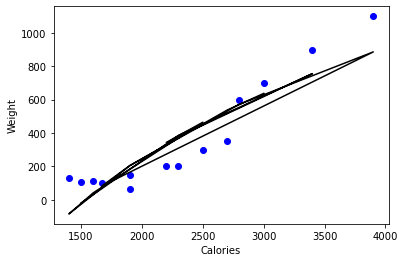

In [26]:
#Data Vizualization
import matplotlib.pylab as plt
plt.scatter(x=calories_consumed['Calories'],y=calories_consumed['Weight'],color='blue');
plt.plot(calories_consumed['Calories'],pred1,color='black');
plt.xlabel("Calories");plt.ylabel("Weight")

In [27]:
#Exponential Transform
model2=smf.ols("np.log(Weight)~Calories",data=calories_consumed).fit()
model2.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Weight)   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     86.04
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           8.02e-07
Time:                        12:16:39   Log-Likelihood:                -3.3244
No. Observations:                  14   AIC:                             10.65
Df Residuals:                      12   BIC:                             11.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8387      0.299      9.479      0.000       2.186       3.491
Calories       0.0011      0.000      9.276      0.000       0.001       0.001
==============================================================================
Omnibus:                       10.165   Durbin-Watson:                   3.130
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                6.120
Skew:                          -1.240   Prob(JB):                       0.0469
Kurtosis:                       5.083   Cond. No.                     8.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
pred2=model2.predict(calories_consumed)
pred2

0     4.539069
1     5.445947
2     6.692904
3     5.332587
4     5.672666
5     4.652428
6     4.425709
7     4.992508
8     6.012745
9     7.259702
10    4.731780
11    4.992508
12    5.899386
13    6.239465
dtype: float64

Text(0, 0.5, 'Weight')

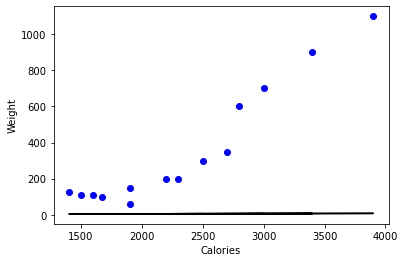

In [29]:
#Data Vizualization
import matplotlib.pylab as plt
plt.scatter(x=calories_consumed["Calories"],y=calories_consumed["Weight"],color='blue')
plt.plot(calories_consumed["Calories"],pred2,color='black')
plt.xlabel("Calories");plt.ylabel("Weight")


In [30]:
#Quadratic transformation
calories_consumed["Calories_Sq"]=calories_consumed.Calories*calories_consumed.Calories
model3=smf.ols('Weight~Calories_Sq',data=calories_consumed).fit()
model3.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     198.4
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           7.96e-09
Time:                        12:19:52   Log-Likelihood:                -80.641
No. Observations:                  14   AIC:                             165.3
Df Residuals:                      12   BIC:                             166.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -143.7949     41.942     -3.428      0.005    -235.180     -52.410
Calories_Sq  8.353e-05   5.93e-06     14.085      0.000    7.06e-05    9.64e-05
==============================================================================
Omnibus:                        4.636   Durbin-Watson:                   2.915
Prob(Omnibus):                  0.098   Jarque-Bera (JB):                1.326
Skew:                          -0.081   Prob(JB):                        0.515
Kurtosis:                       1.501   Cond. No.                     1.34e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
pred3=model3.predict(calories_consumed)
pred3

0       44.139287
1      298.059212
2      821.769058
3      260.472381
4      378.244451
5       70.032437
6       19.916662
7      157.735043
8      511.051255
9     1126.640021
10      89.151605
11     157.735043
12     465.111794
13     607.941752
dtype: float64

Text(0.5, 0, 'Calories')

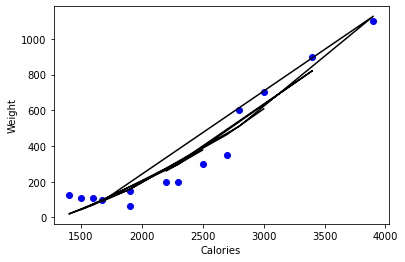

In [40]:
import matplotlib.pylab as plt
plt.scatter(x=calories_consumed["Calories"],y=calories_consumed["Weight"],color='blue')
plt.plot(calories_consumed['Calories'],pred3,color='black')
plt.ylabel("Weight")
plt.xlabel("Calories")